<a href="https://colab.research.google.com/github/Dnyanada-Jalindre-18/Deep-Learning/blob/main/Chest_X_ray_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chest X-Ray dataset
## Importing Libraries and dataset

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.model_selection import train_test_split
import zipfile
import os
import cv2
import matplotlib.pyplot as plt

## Unzipping the contents of dataset

In [2]:
# Extracting the contents from chest X-Ray dataset
with zipfile.ZipFile('/content/drive/MyDrive/chest_xray.zip') as file:
    file.extractall("")

In [3]:
# Creating a variable to store the path for Train folder
train_path = os.listdir('/content/chest_xray/train')
train_path

['.DS_Store', 'NORMAL', 'PNEUMONIA']

As we can see above, Train folder contains two sub folders : NORMAL and PNEUMONIA. Now let's check how many images are there in each folder by simply using len() function. 

In [4]:
# storing NORMAL folder path
normal_data = os.listdir('/content/chest_xray/train/NORMAL')

In [5]:
# storing PNEUMONIA folder path
pneumonia_data = os.listdir('/content/chest_xray/train/PNEUMONIA')

In [6]:
# Checking length of NORMAL data
len(normal_data)

1342

In [7]:
# Checking length of PNEUMONIA data
len(pneumonia_data)

3876

## Separating features and labels of training data

In [8]:
# list for storing features (images)
x = []
# list for storing labels
y = []

for each in train_path:
    try:
        image_path = os.listdir('/content/chest_xray/train/' + each)
        for image in image_path:
            #print(img)
            try:
                img = cv2.imread('/content/chest_xray/train/' + each + '/' + image,0)
                img = cv2.resize(img, (100, 100))
                x.append(img)
                if (each == "NORMAL"):
                    y.append(0)
                else :
                    y.append(1)
            except:
                pass
    except:
         pass

In [9]:
len(x)

5216

In [10]:
len(y)

5216

## Converting list data into NumPy array

In [11]:
type(x)

list

In [12]:
x = np.array(x)
y = np.array(y)

In [13]:
print("X_shape : ", x.shape)
print("y_shape : ", y.shape)

X_shape :  (5216, 100, 100)
y_shape :  (5216,)


In [14]:
set(y)

{0, 1}

Here we can observe that shape of x is 100 x 100 pixels 5216 images

## Let's visualize some images

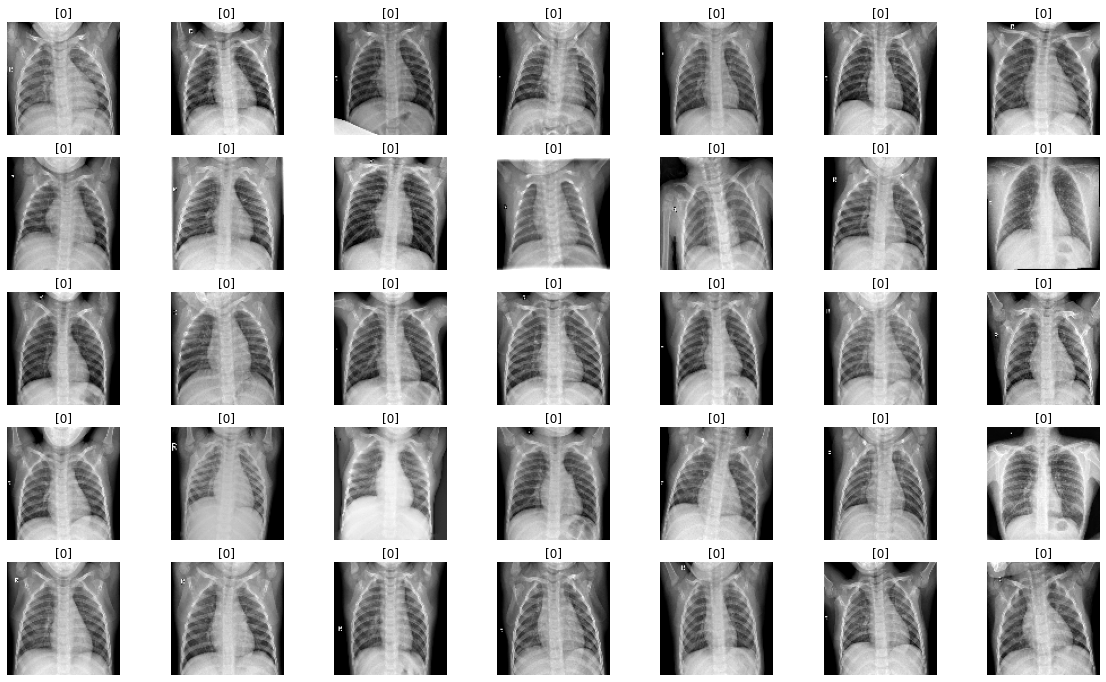

In [17]:
fig, axes = plt.subplots(5, 7, figsize=(20,12))
axes = axes.ravel()

for i in np.arange(0, 35):
    axes[i].imshow(x[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title([y[i]])

In [18]:
# now just reshape it to understand that these are gray scale images
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)

In [19]:
x.shape

(5216, 100, 100, 1)

## Splitting the data into train and test set

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [21]:
# let's see shape of splitted data

print("Shape of x_train is : ", x_train.shape, " x_test : ", x_test.shape)
print("Shape of y_train is : ", y_train.shape, " y_test : ", y_test.shape)

Shape of x_train is :  (3651, 100, 100, 1)  x_test :  (1565, 100, 100, 1)
Shape of y_train is :  (3651,)  y_test :  (1565,)


## Data Normalization

In [22]:
x_train = x_train/255
x_test = x_test/255

In [24]:
x_train[1]

array([[[0.07843137],
        [0.0745098 ],
        [0.0745098 ],
        ...,
        [0.11764706],
        [0.12941176],
        [0.14901961]],

       [[0.06666667],
        [0.06666667],
        [0.0627451 ],
        ...,
        [0.10588235],
        [0.1254902 ],
        [0.1372549 ]],

       [[0.02745098],
        [0.05098039],
        [0.04705882],
        ...,
        [0.10588235],
        [0.11372549],
        [0.13333333]],

       ...,

       [[0.10196078],
        [0.10196078],
        [0.10980392],
        ...,
        [0.3254902 ],
        [0.19607843],
        [0.30980392]],

       [[0.10588235],
        [0.09803922],
        [0.10196078],
        ...,
        [0.15686275],
        [0.18039216],
        [0.30196078]],

       [[0.10980392],
        [0.10196078],
        [0.09411765],
        ...,
        [0.1254902 ],
        [0.23529412],
        [0.15294118]]])

## Applying CNN model

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(32,(5,5), activation="relu", input_shape=(100,100,1)))
model.add(Conv2D(32,(5,5), activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(1,activation='sigmoid'))

In [27]:
# Architecture of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4333632   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [28]:
# compiling the model by defining type of loss, optimizer and metrics.
# we're using loss as 'binary crossentropy' because our model predicting between two categories 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.fit(x_train,y_train,epochs=10,batch_size=50,validation_data=(x_test,y_test))

Epoch 1/10
74/74 [==============================] - 10s 33ms/step - loss: 0.6300 - accuracy: 0.7306 - val_loss: 0.1951 - val_accuracy: 0.9291
Epoch 2/10
74/74 [==============================] - 2s 29ms/step - loss: 0.1603 - accuracy: 0.9416 - val_loss: 0.1579 - val_accuracy: 0.9419
Epoch 3/10
74/74 [==============================] - 2s 29ms/step - loss: 0.1395 - accuracy: 0.9464 - val_loss: 0.1127 - val_accuracy: 0.9553
Epoch 4/10
74/74 [==============================] - 2s 29ms/step - loss: 0.1397 - accuracy: 0.9462 - val_loss: 0.1125 - val_accuracy: 0.9565
Epoch 5/10
74/74 [==============================] - 2s 29ms/step - loss: 0.1030 - accuracy: 0.9675 - val_loss: 0.2253 - val_accuracy: 0.9029
Epoch 6/10
74/74 [==============================] - 2s 29ms/step - loss: 0.4260 - accuracy: 0.8300 - val_loss: 0.1482 - val_accuracy: 0.9425
Epoch 7/10
74/74 [==============================] - 2s 29ms/step - loss: 0.1644 - accuracy: 0.9445 - val_loss: 0.1114 - val_accuracy: 0.9642
Epoch 8/10
7

In [30]:
model.evaluate(x_test, y_test)

49/49 [==============================] - 0s 7ms/step - loss: 0.1080 - accuracy: 0.9674


[0.10798322409391403, 0.9674121141433716]

## Saving the model

In [31]:
model.save("final_model.h5")

## Time for some testing

In [44]:
image = cv2.imread('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg', 0)

In [45]:
image.shape

(1317, 1857)

In [46]:
image = np.resize(image,(100, 100))

In [47]:
image.shape

(100, 100)

In [48]:
image = image.reshape(1,100,100,1)

In [49]:
model.predict_classes(image)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

In [50]:
model.predict_classes(image)[0]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1], dtype=int32)